<a href="https://colab.research.google.com/github/c-g-well/TrafficFlow/blob/main/projectExperiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

C:\Users\cgwel\AppData\Local\Temp\ipykernel_20424\1139771410.py:28: RuntimeWarning: invalid value encountered in cast
  ustar[1:-1] = 0.5*(un[n-1,2:] + un[n-1,:-2]) - dt/(2*dx)*(f(un[n-1,2:]) - f(un[n-1,:-2]))


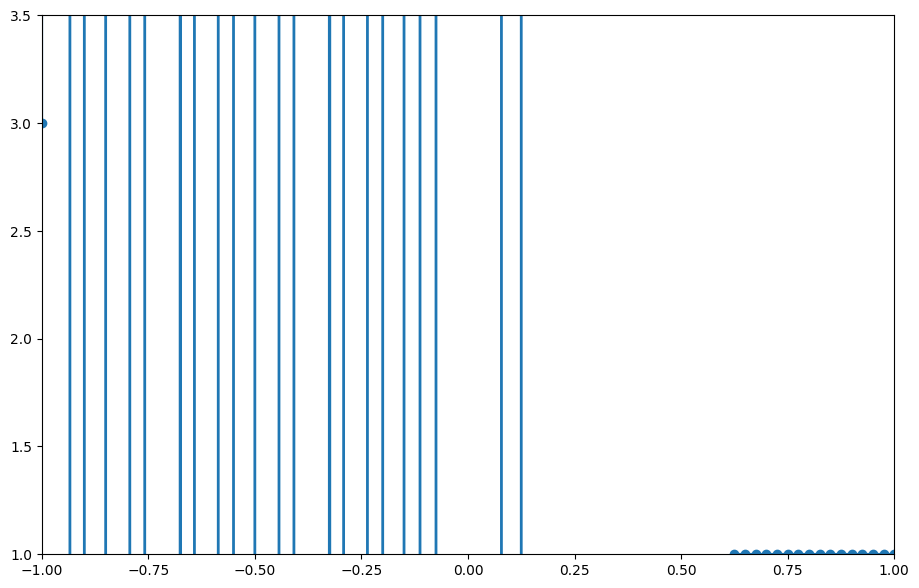

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the mesh generator
def mesh_generator_1d(x_l, x_r, n_nodes):
    h = (x_r - x_l) / (n_nodes-1)
    x_coords = np.linspace(x_l, x_r, n_nodes)
    return h, x_coords

# Define the initial condition
def u_initial(x):
    return np.where(x <= 0, 3, 1)

# Define the exact solution
def u_exact(x, t):
    return np.where(x < 2*t, 3, 1)

# Define the flux function
def f(u):
    return np.power(u, 2) / 2

def godunov(u, nt, dt, dx):
    """ Computes the solution with the Godunov scheme """
    un = np.zeros((nt,len(u)))
    un[:,:] = u.copy()
    ustar = u.copy()
    for n in range(1,nt):
        ustar[1:-1] = 0.5*(un[n-1,2:] + un[n-1,:-2]) - dt/(2*dx)*(f(un[n-1,2:]) - f(un[n-1,:-2]))
        un[n,1:-1] = un[n-1,1:-1] - dt/dx*(f(ustar[2:]) - f(ustar[1:-1]))
    return un

# Set initial condition
x_l = -1
x_r = 1
n_nodes = 81
nt = 25
dt = .02

h, x = mesh_generator_1d(x_l, x_r, n_nodes)
u = u_initial(x)

un = godunov(u, nt, dt, h)

fig = plt.figure(figsize=(11, 7), dpi=100)
plt.plot(x, un[-1,:], marker='o', lw=2)
plt.xlim([x_l, x_r])
plt.ylim([1, 3.5]);


Let $\rho$ denote the density of cars (i.e vehicles per mile)
$\rho$ is restricted to a certian range $0 \leq \rho \leq \rho_{max}$

Since cars are conserved the density and velocity must be related by the continuity equation

$$\rho_t + (\rho u)_x = 0 $$

To obtain a scalar conservation law for $\rho$ we assume $u$ is a given function of $\rho$. On a highway we drive at some speed $u_{max}$

The velocity decreasing as density increases
$$u(\rho) = u_{max} \frac{1-\rho}{\rho_{max}}$$
$$u_{max}= max \,speed$$


At zero density the speed is $u_{max}$, but decreases to zero as $\rho$ increases
$$\rho_t + f(\rho)_x = 0 $$
$$f(\rho) = \rho_{max}(1-\frac{\rho}{\rho_{max}}) $$


Speed
$$s = \frac{f(\rho_l)-f(\rho_r)}{\rho_l = \rho_r} = u_{max}(1-\frac{(\rho_l + \rho_r)}{\rho_{max}})$$
The Entropy condition says that a propagating shock must satisfy $f'(\rho_l) > f'(\rho_r)$ which requires $\rho_l < \rho_r$. $f$ is concave rather than convex.

Initial data
\begin{equation}
    \rho(x,0) = \left\{
        \begin{aligned}
        \rho_l \,\, if \,\, x<0 \\
        \rho_r \,\, if \,\, x>0
        \end{aligned}
        \right.
\end{equation}
The solution is a shock wave traveling with speed $s$
(Leveque 4.1 pg 42)




1. Background and Motivation
Traffic flow describes the relationship between infrastructure e.g. speed limits, traffic controls such as stop lights and stop signs, etc. and travelers. Traffic behaves in a nonlinear and complex way, depending on the interactions between human drivers, and can exhibit shock and rarefaction wave behavior i.e. spontaneous traffic jams. Such behavior can be partially modeled using mathematical means such as partial differential equations and subsequent numerical analysis. Studying PDE traffic flow models provide insight on how to improve the efficiency of transportation systems, reducing traffic jams, accidents, etc.

2. Description of Numerical Method
We employ Godunov’s method, which is first-order accurate in both space and time Verify?, to solve this problem as follows:
$$\bar u^{n+1}_j = \bar u^{n}_j - \lambda(f(^*_j+1/2)-f(^*_j-1/2))$$
Here, $\lambda = \frac{\Delta t}{\Delta x}$, $\bar u$
Godunov’s method is a finite volume method where

The Riemann problem is a piecewise initial condition with one discontinuity as follows:  
$$ u_0(x)=   \left\{
\begin{array}{ll}
      u_L, & x<0\\
      u_R, & x>0\\
\end{array}
\right.  $$
In the traffic flow model, when $u_L>u_R$, we expect a continuous rarefaction wave analogous to a breakup of a traffic jam or in the case where $u_R=0$, cars accelerating at a stoplight turning green. When $u_R<u_L$, we expect the formation of a shock wave analogous to the beginning of a traffic jam.

3. Theory
Perhaps one of the simplest models of traffic flow is the scalar conservation law $\rho_{t} + (\rho u)_{x} = 0$ where $\rho$ denotes the density of cars (in terms of number of vehicles in a given length) and $u$ the velocity. The conservative form of this law becomes $\rho_{t} + f(\rho)_{x} = 0$ where $u(\rho) = u_{max}(1 - \frac{\rho}{\rho_{max}})$ with flux equation $f(\rho) = \rho u_{max}(1 - \frac{\rho}{\rho_{max}})$

We note that the second derivative of the flux term with respect to $\rho$ is $\frac{\partial^2 f}{\partial \rho ^2} = \frac{-2u_{max}}{\rho_{max}}$ so the flux function is non convex. As a result of the non convex flux, the entropy solution must satisfy the following condition to be physically relevant: $$\frac{f(u)-f(u_L)}{u-u_L} \geq s \geq \frac{f(u)-f(u_R)}{u-u_R}$$

We also note that the equation is nonlinear so the solution can develop both shock and rarefaction waves, with discontinuities not necessarily traveling along characteristics.
Implications of nonlinearity, stability?


https://www.its.uci.edu/~wjin/publications/jin2000thesis.pdf


Timeline:

17-April: Numerical description godunov method + Riemann problem
debugging convergence analysis, stability (nonlinear stability in our case): $\textbf{\underline{Numerical methods for conservation laws from analysis to algorithms}} $ (Jan Hesthaven) and $\textbf{\underline{Numerical methods for conservation laws}}$ (Randall LeVeque) books have it

24-April: theory: what's the advantage of the method, where it’s used etc. Reimann problem

1-May: want the whole project description, mathematical method, code


$\textbf{1-D Advection equation } $
\begin{equation}
       \partial_t u + \partial_x u = 0,
\end{equation}

$\textbf{Algorithm 4.1 Reconstruct-evolve-average } $(Leveuqe FVM red book pg 76)
1. Reconstruct a piecewise polynomial function $\tilde{q}^n(x, t_n)$ defined for all x, from the cell
averages $Q_n$
In the simplest case this is a piecewise constant function that takes the
value $Q_n$ in the ith grid cell, i.e.,
$$\tilde{q}^n(x, t_n) = Q_i^n \text{ for all x} \in C_i$$

2. Evolve the hyperbolic equation exactly (or approximately) with this initial data to obtain
$\tilde{q}^n(x, t_{n+1})$ a time $\Delta t$ later.

3. Average this function over each grid cell to obtain new cell averages
$$Q_i^{n+1} = \frac{1}{\Delta x} \int_{C_i} \tilde{q}^n(x, t_{n+1}) dx


In [ ]:
# Define the mesh generator
def mesh_generator_1d(x_l, x_r, n_nodes):
    h = (x_r - x_l) / (n_nodes-1)
    x_coords = np.linspace(x_l, x_r, n_nodes)
    return h, x_coords

# Define the initial condition function g(x)
def g(x):
    return np.where(x<0, 2, 1)



In [ ]:

def jumpFinder(arr):
    return np.where(np.diff(arr) != 0)[0] + 1

def plotArray(arr):
    indices = np.arange(len(arr))

    plt.figure(figsize=(10, 6))
    plt.plot(indices, arr, marker='o')
    plt.title('Plot of Array')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()





In [ ]:
h,x = mesh_generator_1d(-1,1,4)
t0 = 0
x

dt = 0.5*h
Q = g(x)
g(x)

# rea_advection(Q,c,dt,h)

# np.linalg.norm(np.abs(rea_advection(Q,c,dt,h)-g(x-c*T)),ord = 1)


array([2, 2, 1, 1])

In [ ]:
g(x)


array([2, 2, 1, 1, 1])

In [ ]:
jumpFinder(g(x))

array([2], dtype=int64)

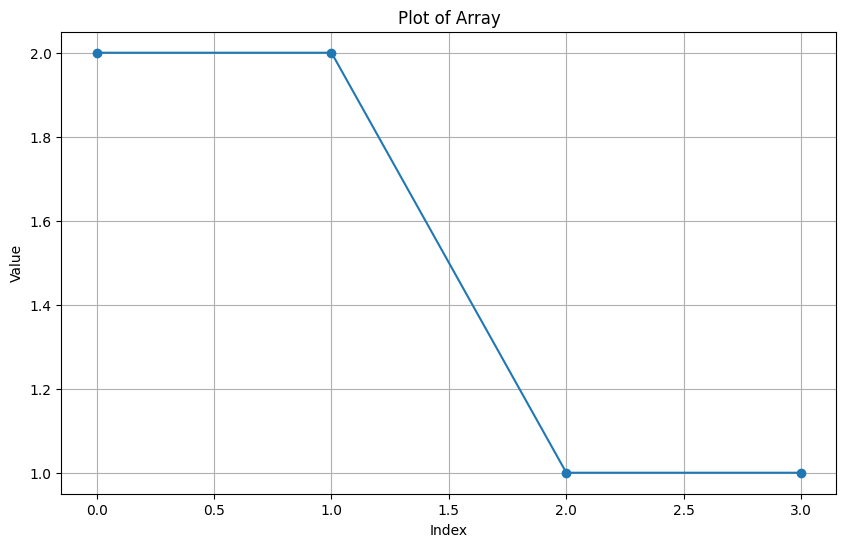

In [ ]:

#Reconstruct
x
u0 = g(x)
u0
dt
plotArray(u0)




In [ ]:
(u[2]*(h-1*dt*1) + u[1]*(1*dt*1 -(-0.5)))

1.9999999999999998

In [ ]:
h

0.6666666666666666

In [ ]:
u

array([2, 2, 1, 1, 1])

In [ ]:
x

array([-1. , -0.5,  0. ,  0.5,  1. ])

In [ ]:
def rea(x,k,dt,a):


In [ ]:
def rea_advection(Q, c, dt, dx):
    # Number of grid cells
    n = len(Q)

    # Step 1: Reconstruct
    q_tilde = Q.copy()

    # Step 2: Evolve
    q_tilde_next = np.zeros_like(q_tilde)
    for i in range(n):
        if i == 0:  # boundary condition
            q_tilde_next[i] = q_tilde[i] - c * dt / dx * (q_tilde[i] - q_tilde[-1])
        else:
            q_tilde_next[i] = q_tilde[i] - c * dt / dx * (q_tilde[i] - q_tilde[i-1])

    # Apply periodic boundary conditions
    q_tilde_next[0] = q_tilde_next[-1]

    # Step 3: Average
    Q_next = q_tilde_next  # for piecewise constant reconstruction

    return Q_next

In [ ]:

# Initialize lists to store h values and errors
h_values = []
errors = []
dtSum = 0
# Time interval
T = 2.0

# Run the function for each k value
for k in range(5, 11):
    n_nodes = 2**k
    h, x = mesh_generator_1d(-1, 1, n_nodes)
    dt = 0.5 * h


    # Initial cell averages
    Q = g(x)

    # Advection speed
    c = 1.0

    dtSum += c*dt

    # Number of time steps
    num_steps = int(T / dt)

    # Apply the REA algorithm
    for _ in range(num_steps):
        Q = rea_advection(Q, c, dt, dx)

    # Compute the exact solution at final time
    # u_exact = g(x - c*T)
    u_exact = g(x)

    # Compute the error at final time
    error = np.linalg.norm(np.abs(Q - u_exact),ord = 1)

    # Store h and error
    h_values.append(h)
    errors.append(error*h)




NameError: name 'rea_advection' is not defined

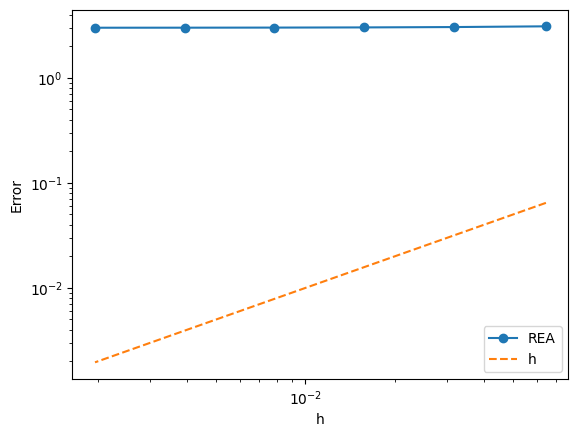

In [ ]:
# Plot the convergence
plt.loglog(h_values, errors, 'o-', label='REA')
plt.loglog(h_values, h_values, '--', label='h')
plt.xlabel('h')
plt.ylabel('Error')
plt.legend()
plt.show()

[5]


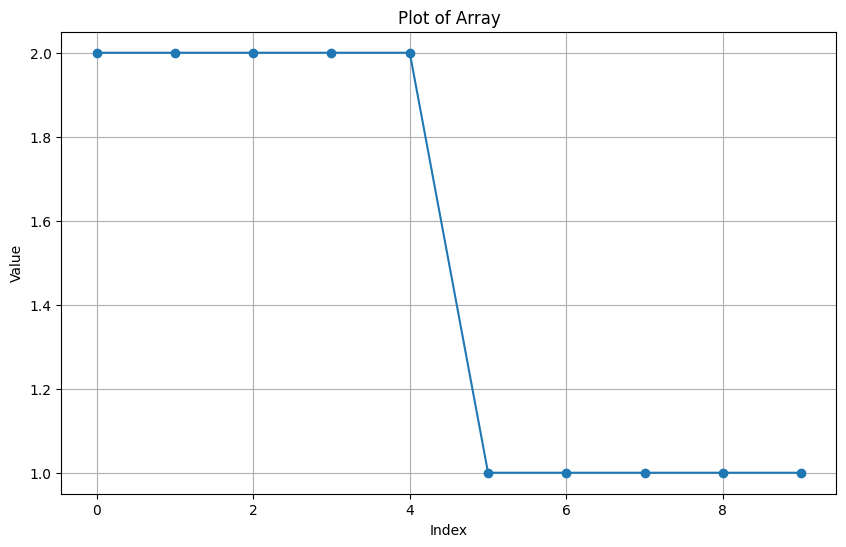

In [ ]:

# Time interval
T = 2.0

# Initialize the figure
fig = plt.figure(figsize=(5, 5))

# Run the function for each k value
for k in range(5, 13):
    n_nodes = 2**k
    h, x = mesh_generator_1d(-1, 1, n_nodes)
    dt = 0.5 * h

    # Initial cell averages
    Q = g(x)

    # Advection speed
    c = 1.0

    # Number of time steps
    num_steps = int(T / dt)

    # Apply the REA algorithm and plot each step
    for n in range(num_steps):
        Q = rea_advection(Q, c, dt, dx)

        # Clear the figure
        fig.clear()

        # Plot the current solution
        plt.plot(x, Q, label=f'Time Step: {n}/{num_steps}')
        plt.xlim(min(x), max(x))
        plt.ylim(min(Q), max(Q))
        plt.xlabel('$x$')
        plt.ylabel('approximation of $u$')
        plt.legend()
        plt.title('REA Method for Advection Equation')

        # Display the figure
        display(fig)
        time.sleep(0.001)
        clear_output(wait=True)


In [ ]:
def godunov_advection(Q, c, dt, dx):
    # Number of grid cells
    n = len(Q)

    # Initialize the next time step solution
    Q_next = np.zeros_like(Q)

    # Apply Godunov's method
    for i in range(n):
        if i == 0:  # boundary condition
            flux = c * min(Q[i], Q[-1]) if c > 0 else c * max(Q[i], Q[-1])
            Q_next[i] = Q[i] - dt / dx * (flux - c * Q[-1])
        else:
            flux = c * min(Q[i], Q[i-1]) if c > 0 else c * max(Q[i], Q[i-1])
            Q_next[i] = Q[i] - dt / dx * (flux - c * Q[i-1])

    # Apply periodic boundary conditions
    Q_next[0] = Q_next[-1]

    return Q_next

In [ ]:

# Initialize lists to store h values and errors
h_values = []
errors = []

# Time interval
T = 2.0

# Run the function for each k value
for k in range(5, 13):
    n_nodes = 2**k
    h, x = mesh_generator_1d(-1, 1, n_nodes)
    dt = 0.5 * h

    # Initial cell averages
    Q = g(x)

    # Advection speed
    c = 0.5

    # Number of time steps
    num_steps = int(T / dt)

    # Apply the Godunov's method
    for _ in range(num_steps):
        Q = godunov_advection(Q, c, dt, dx)

    # Compute the exact solution at final time
    u_exact = g(x - c*T)

    # Compute the error at final time
    error = np.max(np.abs(Q - u_exact))

    # Store h and error
    h_values.append(h)
    errors.append(error)




In [ ]:
# Plot the convergence
plt.loglog(h_values, errors, 'o-', label='Numerical')
plt.loglog(h_values, h_values, '--', label='h')
plt.xlabel('h')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:

# Define the initial condition function g(x)
def g(x):
    sigma = 0.01
    return np.exp(-x**2 / sigma**2)


# Time interval
T = 2.0

# Initialize the figure
fig = plt.figure(figsize=(5, 5))

# Run the function for each k value
for k in range(5, 15):
    n_nodes = 2**k
    h, x = mesh_generator_1d(-1, 1, n_nodes)
    dt = 0.5 * h

    # Initial cell averages
    Q = g(x)

    # Advection speed
    c = 0.5

    # Number of time steps
    num_steps = int(T / dt)

    # Apply the Godunov's method and plot each step
    for n in range(num_steps):
        Q = godunov_advection(Q, c, dt, dx)

        # Clear the figure
        fig.clear()

        # Plot the current solution
        plt.plot(x, Q, label=f'Time Step: {n}/{num_steps}')
        plt.xlim(min(x), max(x))
        plt.ylim(min(Q), max(Q))
        plt.xlabel('$x$')
        plt.ylabel('approximation of $u$')
        plt.legend()
        plt.title('Godunov\'s Method for Advection Equation')

        # Display the figure
        display(fig)
        time.sleep(0.001)
        clear_output(wait=True)


Here you seek a numerical solution of $\textbf{Burgers' equation}$

\begin{equation}
       \partial_t u + \frac{1}{2}\partial_x u^2 = 0,
\end{equation}

in the domain $\Omega = [-1,1]$ and a time interval $[0,0.25]$. The boundary condition is $u(0,t) = 3$ and the initial condition is
    
\begin{equation}
    u(x,0) = \left\{
    \begin{aligned}
        3, &\,\,\quad ~if \quad x<0 ,\\
        1 &\,\, \quad ~if \quad x>0.
    \end{aligned}
    \right.
\end{equation}

Given Piecewise constant initial data $u_l = 3 > 1 = u_r$  implies this is case 1 where there is a unique weak solution. Appying the Rankine-Hugoniot  condition

$$\frac{f(u_r)-f(u_l)}{u_l - u_r} =\frac{ \frac{1}{2} 1^2 - \frac{1}{2} 3^2}{1-3} = 2 = s$$

Given s = speed of propogation we our exact solution is:
$$ u(x, t) = \begin{cases}
    3 & \text{if } x < 2t \\
    1 & \text{if } x \geq 2t
\end{cases}
$$


Godunov's method (Hesthaven p124)
$$u_j^{n+1} = u_j^n - \frac{k}{h}[F_{j+\frac{1}{2}}^n - F_{j-\frac{1}{2}}^n]$$
The scheme is in conservation form by construction ensuring correct shock speeds. Unknown is the cell average rather than the point value as with the finite difference scheme.

Consider Burgers's equation
$$ u_{j+\frac{1}{2}}^* =   \left\{
\begin{array}{ll}
      u_l, & s \geq 0\\
      u_r, & s < 0\\
\end{array}
\right.  $$

$$ s = \frac{f(u_l)-f(u_r)}{u_l - u_r}$$

$$u_j^{n+1} = u_j^n - \frac{k}{h} [f(u_{j+\frac{1}{2}}^*) - f(u_{j-\frac{1}{2}}^*)] $$
$u^*$ is computed by solving the Riemann problem exactly and selecting the correct entropy solution.




Godunov flux (Hesthaven p126)
$$F(u,v) = \begin{cases}
    f(u), & u \geq v, & f(u) \geq f(v)\\
    f(v), & u \geq v, & f(u) < f(v)\\
    f(u), & u < v, & f'(u) \geq 0\\
    f(v), & u < v, & f'(v) < 0\\
    f(f^{-1}(0)), & Otherwise\\
\end{cases}$$



Godunov flux function for convex scalar conservation law (Leveque Red p228)

$$F_{i-\frac{1}{2}}^n = \begin{cases}
    f(Q_{i-1}) & \text{if } Q_{i-1} > q_s &\text{and} &s > 0\\
    f(Q_i) & \text{if } Q_i < q_s &\text{and} &s < 0\\
    f(q_s) & \text{if } & Q_{i-1} < q_s < Q_i\\

    \end{cases}
$$

$s$ = $\frac{[f(Q_i) - f(Q_{i-1})]}{Q_i - Q_{i-1}} $

Godunov method reduced to the first-order upwind method

$$Q^{n+1}_i = Q_i - \frac{\Delta t}{\Delta x}[f(Q_i)-f(Q_{i-1})] $$


In [ ]:
def godunov_flux(Q_i_minus_1, Q_i, q_s, s, f):

    """
    Godunov flux function for convex scalar conservation law.
    Q_i_minus_1: Q_{i-1}
    Q_i: Q_i
    q_s = 0 for burgers
    s: speed
    f: flux function
    """
    if Q_i_minus_1 > q_s and s > 0:
        return f(Q_i_minus_1)
    elif Q_i < q_s and s < 0:
        return f(Q_i)
    elif Q_i_minus_1 < q_s < Q_i:
        return f(q_s)
    else:
        raise ValueError("Invalid states.")

# def godunov_method(Q, delta_t, delta_x, f, godunov_flux):
#     Q_next = Q.copy()
#     for i in range(1, len(Q) - 1):  # we skip the first and last points
#         s = (f(Q[i]) - f(Q[i-1])) / (Q[i]-Q[i-1])
#         q_s = 0
#         try:
#             flux_right = godunov_flux(Q[i], Q[i+1], q_s, s, f)
#             flux_left = godunov_flux(Q[i-1], Q[i], q_s, s, f)
#         except ValueError:
#             print(f"Q_i: {Q[i]}, Q_i_minus_1: {Q[i-1]}, q_s: {q_s}")
#             flux_right = flux_left = 0  # or some other default value
#         Q_next[i] = Q[i] - dt / dx * (flux_right - flux_left)
#     return Q_next


def godunov_method(Q, delta_t, delta_x, f, godunov_flux):
    Q_next = Q.copy()
    for i in range(1, len(Q) - 1):  # we skip the first and last points
        s = (f(Q[i]) - f(Q[i-1])) / (Q[i]-Q[i-1])
        # q_s = (Q[i] + Q[i-1]) / 2 - delta_t * s / (2 * delta_x)
        q_s = 0
        try:
            Q_next[i] = Q[i] - delta_t / delta_x * (godunov_flux(Q[i], Q[i+1],q_s,s,f)
                                                    - godunov_flux(Q[i-1], Q[i],q_s,s,f))
        except ValueError:
            print(f"Q_i: {Q[i]}, Q_i_minus_1: {Q[i-1]}, q_s: {q_s}")
        Q_next[i] = Q[i]

    return Q_next






In [ ]:
# i = 3
# Q = u0
# # Q
# s = (f(Q[i]) - f(Q[i-1])) / (Q[i]-Q[i-1])
# # for i in range(1,len(Q)-1):
# s
# # print(f'u0 = {Q}')
# # godunov_flux(3,1,0,))

In [ ]:
# k = 2
# nNodes = 2*k +1
# xL = -1
# xR = 1
# t0 = 0
# T = 0.25

# h,x = mesh_generator_1d(xL,xR,nNodes)
# u0 = u_initial(x)

Harten-Lax-van Leer (HLL) flux (Hesthaven 136)

$$ f^*(u_l, u_r) = \begin{cases}
    f(u_l) & \text{if } x^- \geq 0 \\
    f^*_l & \text{if } s^* \geq 0 \geq s^- \\
	f^*_r &\text{if }  s^+ \geq 0 \geq s^*\\
	f(u_r) &\text{if } s^+ \leq 0
\end{cases}
$$


In [ ]:
# Define the mesh generator
def mesh_generator_1d(x_l, x_r, n_nodes):
    h = (x_r - x_l) / (n_nodes-1)
    x_coords = np.linspace(x_l, x_r, n_nodes)
    return h, x_coords


In [ ]:
# Define the mesh generator
def mesh_generator_1d(x_l, x_r, n_nodes):
    h = (x_r - x_l) / (n_nodes-1)
    x_coords = np.linspace(x_l, x_r, n_nodes)
    return h, x_coords

# Define the initial condition
def u_initial(x):
    return np.where(x <= 0, 3, 1)

# Define the exact solution
def u_exact(x, t):
    return np.where(x < 2*t, 3, 1)

# Define the flux function
def f(u):
    return np.power(u, 2) / 2

def df(u):
    return u

def df_inv(u):
    if u > 0:
     return 1/u
    else: return np.abs(1/u)


In [ ]:

# # Define the domain and grid size
# x_l = -1.0
# x_r = 1.0
# T = 0.25
# t0 = 0


# # Perform the convergence analysis
# errors = []
# h_val = []
# h2_val = []
# error2 = []

# k_values = range(2, 8)
# for k in k_values:
#     n_nodes = 2**k + 1
#     h, x = mesh_generator_1d(x_l, x_r, n_nodes)
#     dt = h/3
#     u = np.zeros((int(np.ceil(T/dt))+1, len(x)))
#     u0 = u_initial(x)
#     for n in range(1, int(np.ceil(T/dt))):
#         # u = godunov_burgers_eq(f, df, df_inv, t0, T, x, h, u0)
#         u0 = godunov_method(u0,dt,h,f,godunov_flux)
#         u[n] = u0
#         # u = godunov_burgers_eq_animation()
#     error = np.linalg.norm(u[0] - u_exact(x, T), ord = 1)
#     errors.append(error*h)
#     error2.append(error*h**2)

#     h_val.append(h)
#     h2_val.append(h**2)




In [ ]:
import numpy as np

# Define the domain and grid size
x_l = -1.0
x_r = 1.0
T = 0.25
t0 = 0

# Define the flux function for the Burgers' equation
def f(Q):
    return 0.5 * Q**2

def godunov_flux(u_left, u_right, q_s, s, f):
    """ Compute the Godunov flux """
    if s >= 0:
        return f(u_left)
    elif u_left <= q_s <= u_right:
        return f(q_s)
    else:
        return f(u_right)

# Perform the convergence analysis
errors = []
h_val = []
h2_val = []
error2 = []

k_values = range(2, 5)
for k in k_values:
    n_nodes = 2**k + 1
    h, x = mesh_generator_1d(x_l, x_r, n_nodes)
    dt = h/3
    u = np.zeros((int(np.ceil(T/dt))+1, len(x)))
    u0 = u_initial(x)

    # Find the index where the initial condition changes
    change_index = np.where(np.diff(u0) != 0)[0][0] + 1

    for n in range(1, int(np.ceil(T/dt))):
        u0_old = u0.copy()
        for i in range(change_index, len(u0)-1 ):  # start from the change_index
            s = (f(u0_old[i]) - f(u0_old[i-1])) / (u0_old[i]-u0_old[i-1])
            q_s = 0
            try:
                u0[i] = u0_old[i] - dt / dx * (godunov_flux(u0_old[i], u0_old[i+1], q_s, s, f)
                                                - godunov_flux(u0_old[i-1], u0_old[i], q_s, s, f))
            except ValueError:
                print(f"Q_i: {u0_old[i]}, Q_i_minus_1: {u0_old[i-1]}, q_s: {q_s}")
                continue  # skip to the next iteration
        u[n] = u0
    error = np.linalg.norm(u[-1] - u_exact(x, T), ord = 1)
    errors.append(error*h)
    error2.append(error*h**2)

    h_val.append(h)
    h2_val.append(h**2)


In [ ]:
len(u_exact(x,T))
u[-2]
u_exact(x,T)

In [ ]:
import numpy as np

# Define the initial condition, domain, and time interval
u0 = np.array([3, 3, 3, 1, 1])
domain = [-1, 1]
time_interval = [0, 0.25]

# Define the discretization parameters
dx = (domain[1] - domain[0]) / (len(u0) - 1)
dt = (time_interval[1] - time_interval[0]) / 100  # for example

# Initialize the solution with the initial condition
Q = np.copy(u0)

# Define the flux function for the Burgers' equation
def f(Q):
    return 0.5 * Q**2

# Time-stepping loop
for n in range(100):  # for example
    Q = godunov_method(Q, dt, dx, f, godunov_flux)


In [ ]:
# Generate the convergence plot
plt.figure()
plt.loglog(h_val, errors, 'o-', label = 'Godunov')
plt.loglog(h_val, h_val, 'o-', label = 'h')

plt.xlabel('h')
plt.ylabel('Error at final time (1-norm)')
plt.title('Convergence plot')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Generate the convergence plot
plt.figure()
plt.loglog(h2_val, error2, 'o-', label = 'Godunov')
plt.loglog(h2_val, h2_val, 'o-', label = 'h**2')

plt.xlabel('h')
plt.ylabel('Error at final time (1-norm)')
plt.title('Convergence plot')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

def godunov_burgers_eq_animation(f, godunov_flux, t0, T, x, h, u0):
    dt = h / 3
    Nt = int((T - t0) / dt)
    u = np.zeros((Nt + 1, len(x)))
    u[0] = u0

    fig = plt.figure(figsize=(5, 5))
    for n in range(Nt):
        u[n + 1] = godunov_method(u[n], dt, h, f, godunov_flux)

        fig.clear()
        plt.plot(x, u[n], label=f'Time Step: {n}/{Nt}')
        plt.xlim(min(x), max(x))
        plt.xlabel('$x$')
        plt.ylabel('approximation of $u$')
        plt.legend()
        plt.title(f'Godunov Method for Burgers Equation')

        display(fig)
        time.sleep(0.001)
        clear_output(wait=True)


In [ ]:
godunov_burgers_eq_animation(f,godunov_flux,t0,T,x,h,u0)

In [ ]:
# def Godunov(f, f_prime, f_type, f_extrema):
#     def flux(j, u, dx, dt):
#         if f_type == 'convex':
#             flux = max(f(max(u[j], f_extrema)), f(min(u[j+1], f_extrema)))
#         elif f_type == 'concave':
#             flux = min(f(min(u[j], f_extrema)), f(max(u[j+1], f_extrema)))
#         else:
#             flux = 0
#         return flux
#     return flux
